<a href="https://colab.research.google.com/github/f247805/NLP/blob/main/whitespace_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install PyPDF2

In [1]:
from google.colab import auth
auth.authenticate_user()


In [9]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text() or ""
    return text

pdf_path = '/content/drive/MyDrive/NLP/Life 3.0_ Being Human in the Age of Artificial Intelligence.pdf'
text = extract_text_from_pdf(pdf_path)


In [10]:
import re
from PyPDF2 import PdfReader

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text() or ""
    return text

def clean_text(text):
    # Remove lines starting with keywords like "Table" or "Figure"
    text = re.sub(r'(^Table\s+\d+.*$|^Figure\s+\d+.*$)', '', text, flags=re.MULTILINE)

    # Remove any text that seems to be structured as a table
    text = re.sub(r'(\s+\|\s+|\s{4,})', ' ', text)

    # Remove brackets and their content
    text = re.sub(r'\[.*?\]', '', text)  # Remove square brackets and content
    text = re.sub(r'\(.*?\)', '', text)  # Remove round brackets and content
    text = re.sub(r'\{.*?\}', '', text)  # Remove curly brackets and content

    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)  # Remove HTTP and HTTPS URLs
    text = re.sub(r'www\.\S+', '', text)  # Remove www URLs

    # Remove exclamation marks, question marks, and other punctuation
    text = re.sub(r'[!?\.,:;\'\"—]', '', text)

    # Remove single and double quotation marks
    text = re.sub(r'[\'\"]', '', text)

    # Remove excessive whitespace (including new lines and multiple spaces)
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\n+', '\n', text)  # Replace multiple new lines with a single new line

    # Remove dots between words or characters (e.g., a.samnn -> asamnn)
    text = re.sub(r'(?<=[a-zA-Z])\.(?=[a-zA-Z])', '', text)

    # Strip leading and trailing whitespace
    text = text.strip()

    return text

cleaned_text = clean_text(text)




White space **`bold text`**

In [11]:

# Split text into chunks
def split_text_into_chunks(text, num_chunks):
    chunk_size = len(text) // num_chunks
    return [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
# Split text into 400 chunks (documents)
num_chunks = 1300
documents = split_text_into_chunks(cleaned_text, num_chunks)

In [12]:
# Function to apply whitespace tokenization
def whitespace_tokenizer(text):
    # Split text into tokens based on whitespace
    return text.split()

# Tokenize each document
tokenized_documents = [' '.join(whitespace_tokenizer(doc)) for doc in documents]




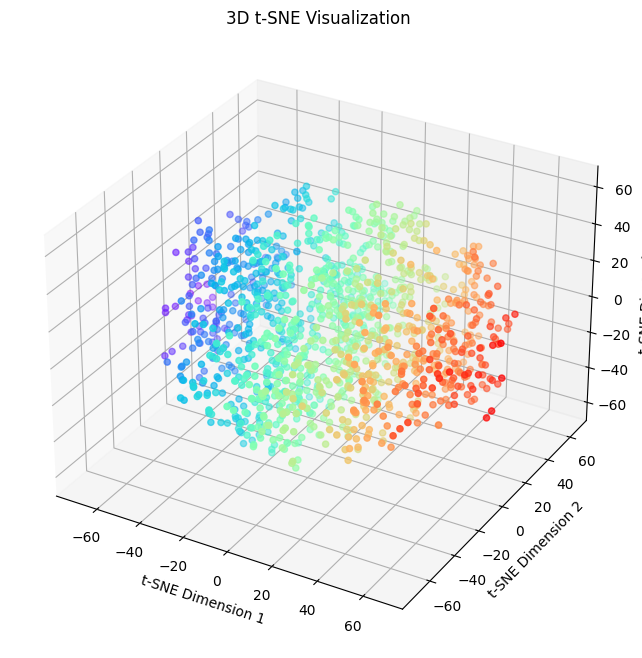

In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
# Apply TF-IDF and t-SNE
def apply_tfidf_tsne(documents):
    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Apply t-SNE
    tsne = TSNE(n_components=3, random_state=30, perplexity=20, n_iter=3000)
    tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

    return tsne_result

# Function to plot t-SNE results
def plot_3d_tsne(tsne_result):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
     # Normalize the t-SNE result to map the colors
    norm = Normalize(vmin=np.min(tsne_result[:, 0]), vmax=np.max(tsne_result[:, 0]))
    # Map each point's t-SNE values to a color map
    colors = cm.rainbow(norm(tsne_result[:, 0]))  # You can use tsne_result[:, 1] or [:, 2] too for different color bases
    ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2],c=colors, marker='o')

    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_zlabel('t-SNE Dimension 3')
    ax.set_title('3D t-SNE Visualization')
    plt.show()

# Path to the PDF file
pdf_path = '/content/drive/MyDrive/NLP/Life 3.0_ Being Human in the Age of Artificial Intelligence.pdf'
# Apply TF-IDF and t-SNE
tsne_result = apply_tfidf_tsne(tokenized_documents)

# Plot the t-SNE results
plot_3d_tsne(tsne_result)

Byte pair encodeing and wordwectwo